![(book cover)](https://covers.oreillystatic.com/images/0636920167433/cat.gif "(book cover)")
### **Programming Quantum Computers** by O'Reilly Media -  [**book Info**](http://shop.oreilly.com/product/0636920167433.do)  - [**all code samples**](https://oreilly-qc.github.io)

#### **Code samples for Chapter 6**
These code samples were written by Eric Johnston, Nic Harrigan, and Mercedes Gimeno-Segovia.

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
%matplotlib inline

|0> (-0.167+0j) probability = 2.7889%
|1> (-0.167+0j) probability = 2.7889%
|2> (-0.167+0j) probability = 2.7889%
|3> (0.763-0j) probability = 58.2169%
|4> (-0.167+0j) probability = 2.7889%
|5> (-0.167+0j) probability = 2.7889%
|6> (-0.167+0j) probability = 2.7889%
|7> (-0.167+0j) probability = 2.7889%
|8> (-0.167+0j) probability = 2.7889%
|9> (-0.167+0j) probability = 2.7889%
|10> (-0.167+0j) probability = 2.7889%
|11> (-0.167+0j) probability = 2.7889%
|12> (-0.167+0j) probability = 2.7889%
|13> (-0.167+0j) probability = 2.7889%
|14> (-0.167+0j) probability = 2.7889%
|15> (-0.167+0j) probability = 2.7889%
Total probability: 100%


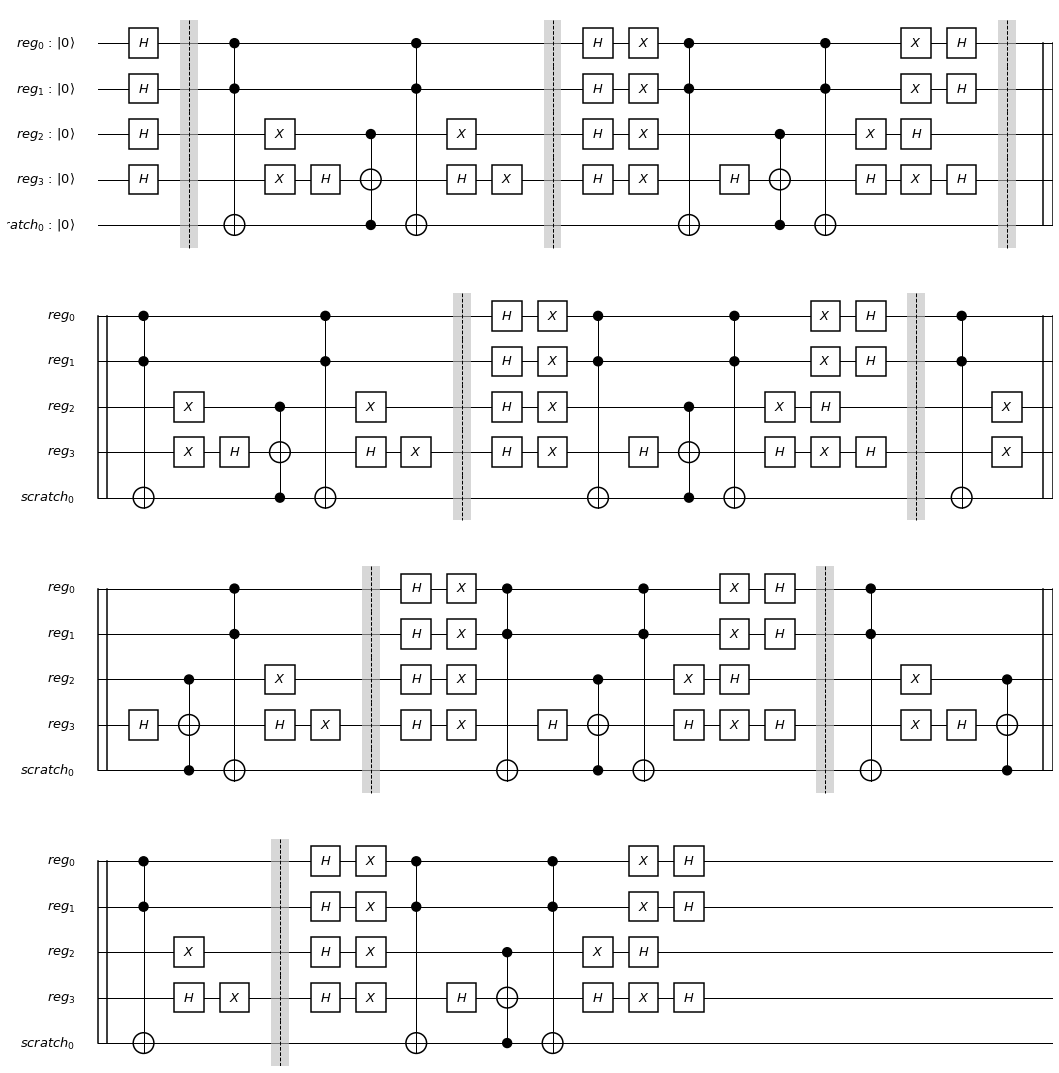

In [20]:
## Example 6-1: Apply mirror to flipped phase

## Note that this looks different from the gates in the book, because
## we're building the operations from Toffoli gates

# Set up the program
reg = QuantumRegister(4, name='reg')
scratch = QuantumRegister(1, name='scratch')
qc = QuantumCircuit(reg, scratch)

def main():
    number_to_flip = 3
    number_of_iterations = 4

    qc.h(reg)

    for i in range(number_of_iterations):
        ## Flip the marked value
        qc.barrier()
        x_bits = ~number_to_flip
        x_list = [reg[x] for x in range(len(reg)) if x_bits & (1 << x)]
        qc.x(x_list)
        multi_cz([x for x in reg])
        qc.x(x_list)

        qc.barrier()
        Grover(reg)

###############################################
## Some utility functions

def Grover(qreg, condition_qubits=None):
    if condition_qubits is None:
        condition_qubits = []
    qc.h(qreg)
    qc.x(qreg)
    multi_cz([x for x in qreg] + condition_qubits)
    qc.x(qreg)
    qc.h(qreg)

def multi_cz(qubits):
    ## This will perform a CCCCCZ on as many qubits as we want,
    ## as long as we have enough scratch qubits
    multi_cx(qubits, do_cz=True)

def multi_cx(qubits, do_cz=False):
    ## This will perform a CCCCCX with as many conditions as we want,
    ## as long as we have enough scratch qubits
    ## The last qubit in the list is the target.
    target = qubits[-1]
    conds = qubits[:-1]
    scratch_index = 0
    ops = []
    while len(conds) > 2:
        new_conds = []
        for i in range(len(conds)//2):
            ops.append((conds[i * 2], conds[i * 2 + 1], scratch[scratch_index]))
            new_conds.append(scratch[scratch_index])
            scratch_index += 1
        if len(conds) & 1:
            new_conds.append(conds[-1])
        conds = new_conds
    for op in ops:
        qc.ccx(op[0], op[1], op[2])
    if do_cz:
        qc.h(target)
    if len(conds) == 0:
        qc.x(target)
    elif len(conds) == 1:
        qc.cx(conds[0], target)
    else:
        qc.ccx(conds[0], conds[1], target)
    if do_cz:
        qc.h(target)
    ops.reverse()
    for op in ops:
        qc.ccx(op[0], op[1], op[2])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
total_prob = 0
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        total_prob += prob
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
print('Total probability: {}%'.format(int(round(total_prob * 100))))
qc.draw()        # draw the circuit


|0> (-0.167+0j) probability = 2.7889%
|1> (-0.167+0j) probability = 2.7889%
|2> (-0.167+0j) probability = 2.7889%
|3> (0.763-0j) probability = 58.2169%
|4> (-0.167+0j) probability = 2.7889%
|5> (-0.167+0j) probability = 2.7889%
|6> (-0.167+0j) probability = 2.7889%
|7> (-0.167+0j) probability = 2.7889%
|8> (-0.167+0j) probability = 2.7889%
|9> (-0.167+0j) probability = 2.7889%
|10> (-0.167+0j) probability = 2.7889%
|11> (-0.167+0j) probability = 2.7889%
|12> (-0.167+0j) probability = 2.7889%
|13> (-0.167+0j) probability = 2.7889%
|14> (-0.167+0j) probability = 2.7889%
|15> (-0.167+0j) probability = 2.7889%
Total probability: 100%


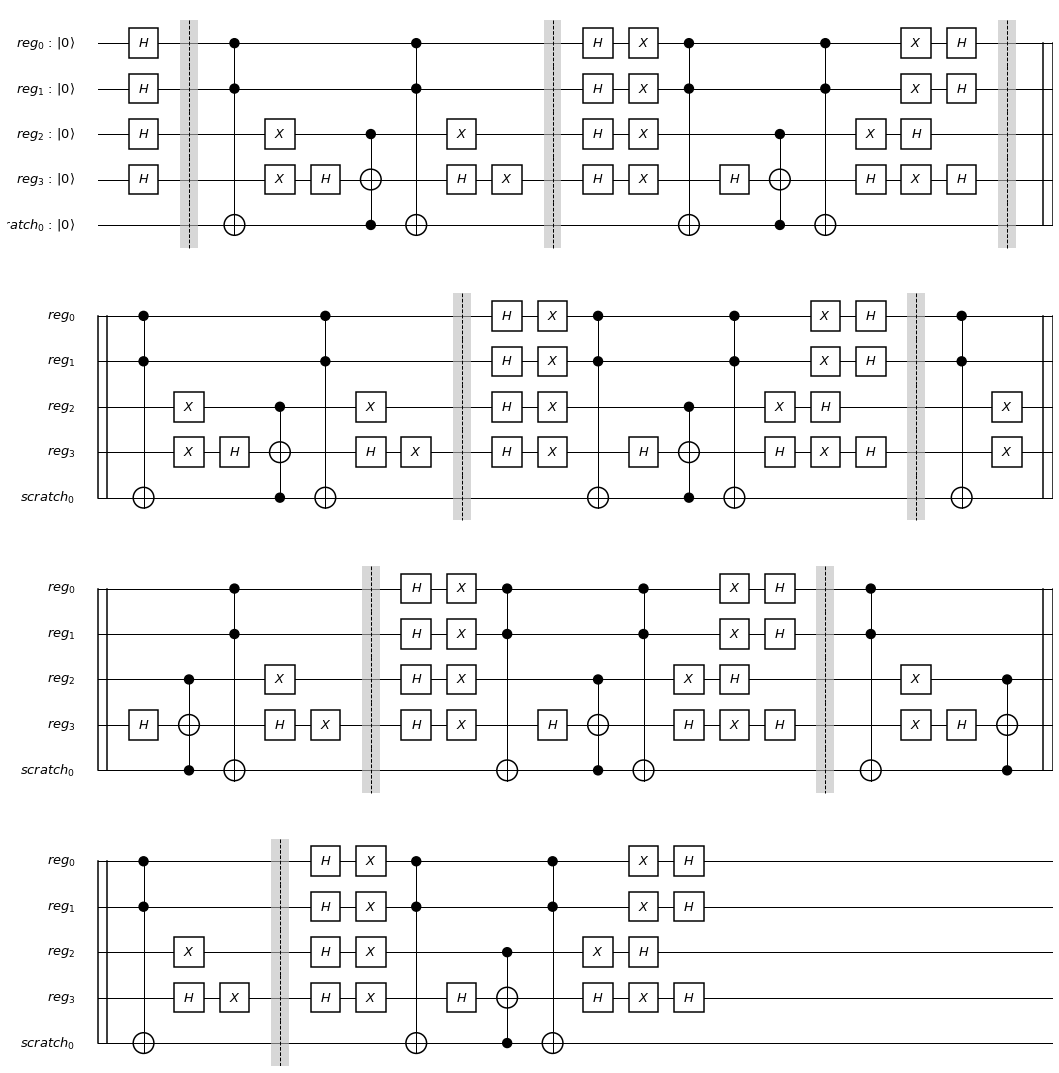

In [19]:
## Example 6-2: Repeated iterations
##  (This code is the same as sample 6-1, and we encourage you to play with
##   the number of repeat iterations)

## Note that this looks different from the gates in the book, because
## we're building the operations from Toffoli gates
## Also, increasing the register size will require increasing the scratch size as well.

# Set up the program
reg = QuantumRegister(4, name='reg')
scratch = QuantumRegister(1, name='scratch')
qc = QuantumCircuit(reg, scratch)

def main():
    number_to_flip = 3
    number_of_iterations = 4

    qc.h(reg)

    for i in range(number_of_iterations):
        ## Flip the marked value
        qc.barrier()
        x_bits = ~number_to_flip
        x_list = [reg[x] for x in range(len(reg)) if x_bits & (1 << x)]
        qc.x(x_list)
        multi_cz([x for x in reg])
        qc.x(x_list)

        qc.barrier()
        Grover(reg)

###############################################
## Some utility functions

def Grover(qreg, condition_qubits=None):
    if condition_qubits is None:
        condition_qubits = []
    qc.h(qreg)
    qc.x(qreg)
    multi_cz([x for x in qreg] + condition_qubits)
    qc.x(qreg)
    qc.h(qreg)

def multi_cz(qubits):
    ## This will perform a CCCCCZ on as many qubits as we want,
    ## as long as we have enough scratch qubits
    multi_cx(qubits, do_cz=True)

def multi_cx(qubits, do_cz=False):
    ## This will perform a CCCCCX with as many conditions as we want,
    ## as long as we have enough scratch qubits
    ## The last qubit in the list is the target.
    target = qubits[-1]
    conds = qubits[:-1]
    scratch_index = 0
    ops = []
    while len(conds) > 2:
        new_conds = []
        for i in range(len(conds)//2):
            ops.append((conds[i * 2], conds[i * 2 + 1], scratch[scratch_index]))
            new_conds.append(scratch[scratch_index])
            scratch_index += 1
        if len(conds) & 1:
            new_conds.append(conds[-1])
        conds = new_conds
    for op in ops:
        qc.ccx(op[0], op[1], op[2])
    if do_cz:
        qc.h(target)
    if len(conds) == 0:
        qc.x(target)
    elif len(conds) == 1:
        qc.cx(conds[0], target)
    else:
        qc.ccx(conds[0], conds[1], target)
    if do_cz:
        qc.h(target)
    ops.reverse()
    for op in ops:
        qc.ccx(op[0], op[1], op[2])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
total_prob = 0
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        total_prob += prob
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
print('Total probability: {}%'.format(int(round(total_prob * 100))))
qc.draw()        # draw the circuit


|0> (0.564-0j) probability = 31.8096%
|1> (0.564-0j) probability = 31.8096%
|2> (0.564-0j) probability = 31.8096%
|3> (-0.059+0j) probability = 0.3481%
|4> (-0.059+0j) probability = 0.3481%
|5> (-0.059+0j) probability = 0.3481%
|6> (-0.059+0j) probability = 0.3481%
|7> (-0.059+0j) probability = 0.3481%
|8> (-0.059+0j) probability = 0.3481%
|9> (-0.059+0j) probability = 0.3481%
|10> (-0.059+0j) probability = 0.3481%
|11> (-0.059+0j) probability = 0.3481%
|12> (-0.059+0j) probability = 0.3481%
|13> (-0.059+0j) probability = 0.3481%
|14> (-0.059+0j) probability = 0.3481%
|15> (-0.059+0j) probability = 0.3481%
Total probability: 100%


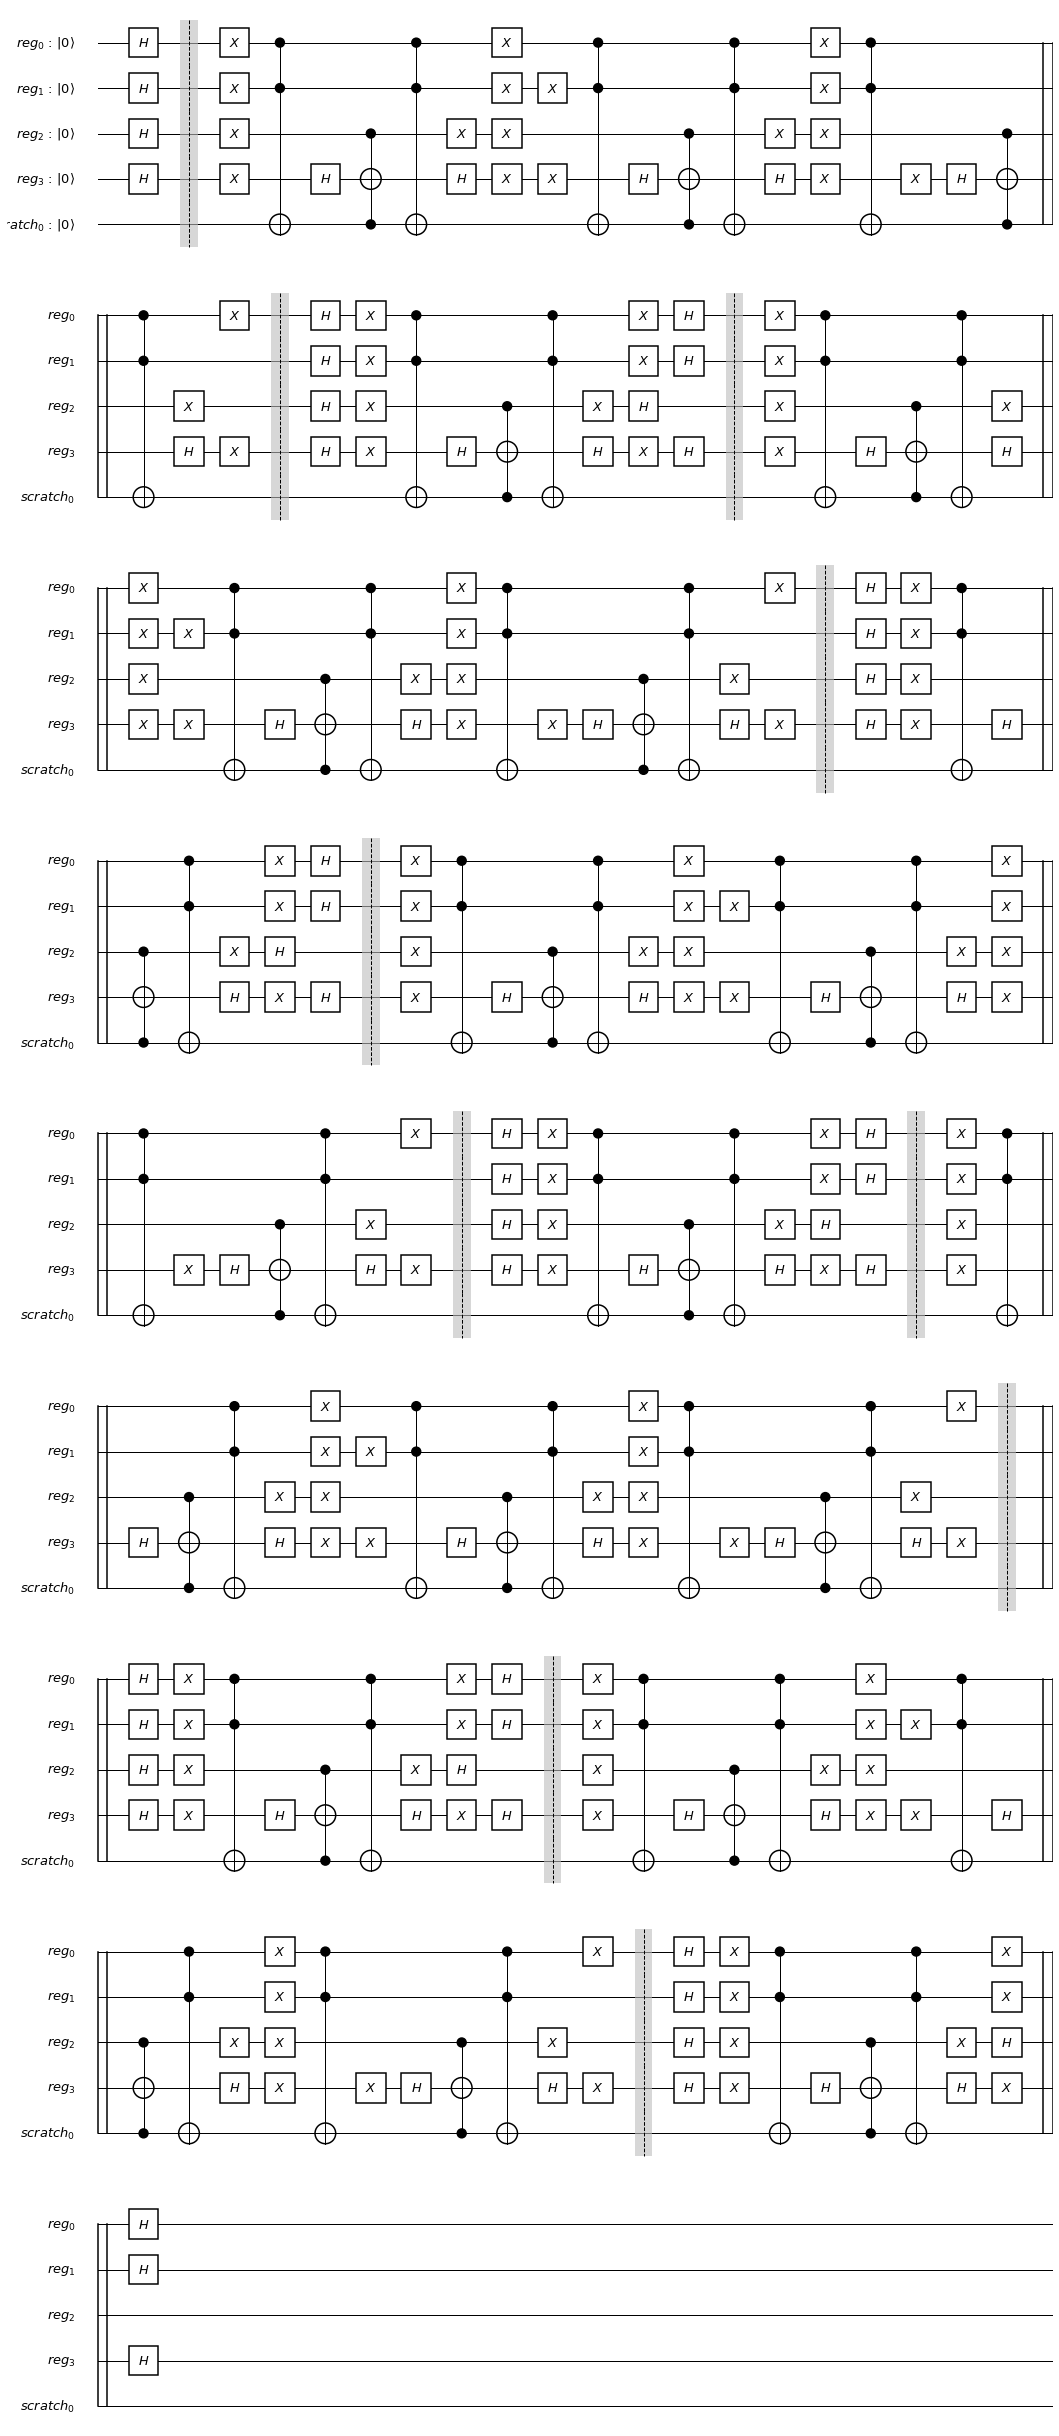

In [18]:
## Example 6-3: Multiple flipped entries

## Note that this looks different from the gates in the book, because
## we're building the operations from Toffoli gates
## Also, increasing the register size will require increasing the scratch size as well.

# Set up the program
reg = QuantumRegister(4, name='reg')
scratch = QuantumRegister(1, name='scratch')
qc = QuantumCircuit(reg, scratch)

def main():
    n2f = [0,1,2]
    number_of_iterations = 5

    qc.h(reg)

    for i in range(number_of_iterations):
        ## Flip the marked value
        qc.barrier()
        for number_to_flip in n2f:
            x_bits = ~number_to_flip
            x_list = [reg[x] for x in range(len(reg)) if x_bits & (1 << x)]
            qc.x(x_list)
            multi_cz([x for x in reg])
            qc.x(x_list)

        qc.barrier()
        Grover(reg)

###############################################
## Some utility functions

def Grover(qreg, condition_qubits=None):
    if condition_qubits is None:
        condition_qubits = []
    qc.h(qreg)
    qc.x(qreg)
    multi_cz([x for x in qreg] + condition_qubits)
    qc.x(qreg)
    qc.h(qreg)

def multi_cz(qubits):
    ## This will perform a CCCCCZ on as many qubits as we want,
    ## as long as we have enough scratch qubits
    multi_cx(qubits, do_cz=True)

def multi_cx(qubits, do_cz=False):
    ## This will perform a CCCCCX with as many conditions as we want,
    ## as long as we have enough scratch qubits
    ## The last qubit in the list is the target.
    target = qubits[-1]
    conds = qubits[:-1]
    scratch_index = 0
    ops = []
    while len(conds) > 2:
        new_conds = []
        for i in range(len(conds)//2):
            ops.append((conds[i * 2], conds[i * 2 + 1], scratch[scratch_index]))
            new_conds.append(scratch[scratch_index])
            scratch_index += 1
        if len(conds) & 1:
            new_conds.append(conds[-1])
        conds = new_conds
    for op in ops:
        qc.ccx(op[0], op[1], op[2])
    if do_cz:
        qc.h(target)
    if len(conds) == 0:
        qc.x(target)
    elif len(conds) == 1:
        qc.cx(conds[0], target)
    else:
        qc.ccx(conds[0], conds[1], target)
    if do_cz:
        qc.h(target)
    ops.reverse()
    for op in ops:
        qc.ccx(op[0], op[1], op[2])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
total_prob = 0
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        total_prob += prob
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
print('Total probability: {}%'.format(int(round(total_prob * 100))))
qc.draw()        # draw the circuit
